In [ ]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

plt.rcParams['font.family'] = 'Arial'

import warnings
warnings.filterwarnings("ignore")


In [2]:
# "MicrobiomeAnalyst was used to perform abundance and LEfSe analyses
# Using the input files
# 1_Processing/chickpea_24hr_asv.csv, 1_Processing/chickpea_24hr_meta.csv, and 1_Processing/taxa_silva.csv."

In [6]:
# F_B ratio

df_fb = pd.read_excel('./Data/abundance_lefse.xlsx', sheet_name='F_B_ratio')
control_vals_updated = df_fb[df_fb['Group'] == 'Control']['value']
chickpea_vals_updated = df_fb[df_fb['Group'] == 'Chickpea']['value']

mannwhitneyu(control_vals_updated, chickpea_vals_updated, alternative='two-sided')

MannwhitneyuResult(statistic=13.0, pvalue=0.00579535854433471)

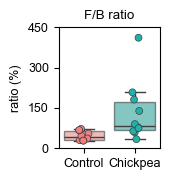

In [7]:
feat = 'value'
orders = ['Control', 'Chickpea']
g_colors = [ 'lightcoral', 'lightseagreen',]


data = df_fb

plt.figure(figsize=(1.8, 1.9))
sns.stripplot(data=data, x='Group', y=feat, jitter=True, edgecolor='gray', linewidth=0.5, palette=g_colors, order=orders)

ax = sns.boxplot(data=data, x='Group', y=feat, order=orders, palette=g_colors, showfliers=False)
for patch in ax.patches:
    patch.set_alpha(0.6)  

plt.title('F/B ratio', fontsize=9.5)
plt.xlabel('')
plt.ylabel('ratio (%)', fontsize=9)
plt.xticks(rotation=0, fontsize=9)
plt.yticks([0, 150, 300, 450], fontsize=9)
plt.tight_layout()
# plt.savefig('./output_figure/F_B_ratio.png', dpi=600)

plt.show()

In [8]:
# abundacne phylum

df_ac = pd.read_excel('./Data/abundance_lefse.xlsx', sheet_name='phylum_sample_rel')
df_ac= df_ac.set_index('features').T
df_ac.head()

features,Actinobacteriota,Bacteroidota,Desulfobacterota,Firmicutes,Fusobacteriota,Proteobacteria,class
Sub002.H04,0,50.841121,1.121495,15.233645,0,32.803738,Control
Sub003.H04,0.186916,39.065421,0.841121,28.224299,0,33.17757,Control
Sub004.H10,1.682243,51.682243,0.093458,28.411215,0,21.214953,Control
Sub005.H10,0.186916,68.130841,0.093458,26.915888,0,4.205607,Control
Sub007.H04,0,45.700935,1.962617,16.542056,0,38.598131,Control


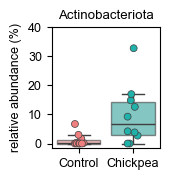

In [9]:
feat = 'Actinobacteriota'
orders = ['Control', 'Chickpea']
g_colors = [ 'lightcoral', 'lightseagreen',]

data = df_ac

plt.figure(figsize=(1.8, 1.9))
sns.stripplot(data=data, x='class', y=feat, jitter=True, edgecolor='gray', linewidth=0.5, palette=g_colors, order=orders)

ax = sns.boxplot(data=data, x='class', y=feat, order=orders, palette=g_colors, showfliers=False)
for patch in ax.patches:
    patch.set_alpha(0.6)  

plt.title('Actinobacteriota', fontsize=9.5)
plt.xlabel('')
plt.ylabel('relative abundance (%)', fontsize=9)
plt.xticks(rotation=0, fontsize=9)
plt.yticks([0, 10, 20, 30, 40], fontsize=9)
plt.tight_layout()
# plt.savefig('./output_figure/Actinobacteriota.png', dpi=600)

plt.show()

In [10]:
# abundacne genus

df_g = pd.read_excel('./Data/abundance_lefse.xlsx', sheet_name='genus_sample_rel')
df_g= df_g.set_index('features').T
df_g.head()


features,Agathobacter,Alistipes,Anaerostignum,Anaerostipes,Bacteroides,Barnesiella,Bifidobacterium,Bilophila,Blautia,Butyricicoccus,...,f_Lachnospiraceae;g_uncultured,f_Oscillospiraceae;g_UA,f_Oscillospiraceae;g_UCG_002,f_Oscillospiraceae;g_UCG_003,f_Oscillospiraceae;g_UCG_005,f_Oscillospiraceae;g_uncultured,f_Ruminococcaceae;g_UBA1819,f_Ruminococcaceae;g_uncultured,f_uncultured;g_uncultured,class
Sub002.H04,0,3.551402,0,0,38.037383,0.46729,0,1.121495,0.186916,0,...,0.093458,0,0,0.093458,0,0.560748,0,0,0,Control
Sub003.H04,0.46729,0,0,0.46729,32.71028,0,0.186916,0.841121,0.093458,0,...,0,0,0,0,0,0.093458,0.560748,0.747664,0,Control
Sub004.H10,0,3.364486,0,0.093458,38.130841,0.373832,1.682243,0.093458,0.373832,0.186916,...,0,0.280374,2.523364,0,0.093458,0,1.121495,0.186916,0,Control
Sub005.H10,0,6.35514,0,0.186916,57.383178,0,0.186916,0.093458,1.214953,0,...,0.093458,0,5.514019,1.308411,0,0,0,0,0,Control
Sub007.H04,0,0,0.093458,0.093458,37.850467,0,0,1.962617,0.280374,0.093458,...,1.869159,0,0,0.280374,0,0,0,0,0,Control


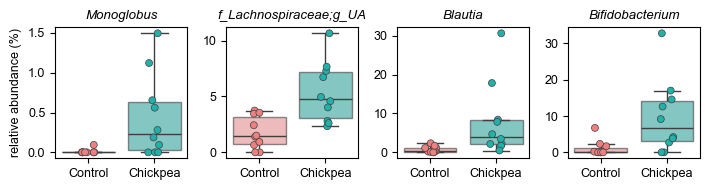

In [23]:
feats = ['Monoglobus', 'f_Lachnospiraceae;g_UA', 'Blautia','Bifidobacterium',] 
orders = ['Control', 'Chickpea']
g_colors = ['lightcoral', 'lightseagreen']
data = df_g

plt.figure(figsize=(7.2, 2)) 

for i, feat in enumerate(feats):
    plt.subplot(1, 4, i + 1)
    
    sns.stripplot(data=data, x='class', y=feat, jitter=True, edgecolor='gray', linewidth=0.5,
                  palette=g_colors, order=orders)
    
    ax = sns.boxplot(data=data, x='class', y=feat, order=orders, palette=g_colors, showfliers=False)
    for patch in ax.patches:
        patch.set_alpha(0.6)

    plt.title(feat, fontsize=9.5, fontstyle='italic')
    plt.xlabel('')
    if i == 0:
        plt.ylabel('relative abundance (%)', fontsize=9)
    else:
        plt.ylabel('')
    plt.xticks(rotation=0, fontsize=9)
    plt.yticks(fontsize=9)
    plt.tight_layout()

plt.tight_layout()
plt.show()


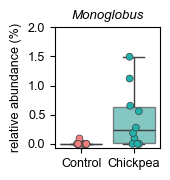

In [ ]:
feat = 'Monoglobus'
orders = ['Control', 'Chickpea']
g_colors = [ 'lightcoral', 'lightseagreen',]

data = df_g

plt.figure(figsize=(1.8, 1.9))
sns.stripplot(data=data, x='class', y=feat, jitter=True, edgecolor='gray', linewidth=0.5, palette=g_colors, order=orders)

ax = sns.boxplot(data=data, x='class', y=feat, order=orders, palette=g_colors, showfliers=False)
for patch in ax.patches:
    patch.set_alpha(0.6)  

plt.title('Monoglobus', fontsize=9.5, fontstyle='italic')
plt.xlabel('')
plt.ylabel('relative abundance (%)', fontsize=9)
plt.xticks(rotation=0, fontsize=9)
plt.yticks([0, 0.5, 1.0, 1.5, 2.0], fontsize=9)
plt.tight_layout()
# plt.savefig('./output_figure/Monoglobus.png', dpi=600)

plt.show()

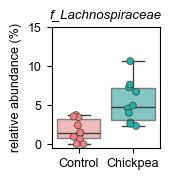

In [12]:
feat = 'f_Lachnospiraceae;g_UA'
orders = ['Control', 'Chickpea']
g_colors = [ 'lightcoral', 'lightseagreen',]

data = df_g

plt.figure(figsize=(1.8, 1.9))
sns.stripplot(data=data, x='class', y=feat, jitter=True, edgecolor='gray', linewidth=0.5, palette=g_colors, order=orders)

ax = sns.boxplot(data=data, x='class', y=feat, order=orders, palette=g_colors, showfliers=False)
for patch in ax.patches:
    patch.set_alpha(0.6) 

plt.title('f_Lachnospiraceae', fontsize=9.5, fontstyle='italic')
plt.xlabel('')
plt.ylabel('relative abundance (%)', fontsize=9)
plt.xticks(rotation=0, fontsize=9)
plt.yticks([0, 5, 10,15], fontsize=9)
plt.tight_layout()
# plt.savefig('./output_figure/f_Lachnospiraceae.png', dpi=600)

plt.show()

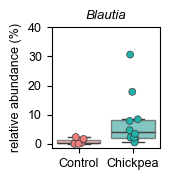

In [13]:
feat = 'Blautia'
orders = ['Control', 'Chickpea']
g_colors = [ 'lightcoral', 'lightseagreen',]

data = df_g
plt.figure(figsize=(1.8, 1.9))
sns.stripplot(data=data, x='class', y=feat, jitter=True, edgecolor='gray', linewidth=0.5, palette=g_colors, order=orders)

ax = sns.boxplot(data=data, x='class', y=feat, order=orders, palette=g_colors, showfliers=False)
for patch in ax.patches:
    patch.set_alpha(0.6) 

plt.title('Blautia', fontsize=9.5, fontstyle='italic')
plt.xlabel('')
plt.ylabel('relative abundance (%)', fontsize=9)
plt.xticks(rotation=0, fontsize=9)
plt.yticks([0, 10, 20,30,40], fontsize=9)
plt.tight_layout()
# plt.savefig('./output_figure/Blautia.png', dpi=600)

plt.show()

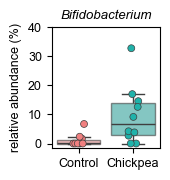

In [14]:
feat = 'Bifidobacterium'
orders = ['Control', 'Chickpea']
g_colors = [ 'lightcoral', 'lightseagreen',]

data = df_g

plt.figure(figsize=(1.8, 1.9))
sns.stripplot(data=data, x='class', y=feat, jitter=True, edgecolor='gray', linewidth=0.5, palette=g_colors, order=orders)

ax = sns.boxplot(data=data, x='class', y=feat, order=orders, palette=g_colors, showfliers=False)
for patch in ax.patches:
    patch.set_alpha(0.6)  

plt.title('Bifidobacterium', fontsize=9.5, fontstyle='italic')
plt.xlabel('')
plt.ylabel('relative abundance (%)', fontsize=9)
plt.xticks(rotation=0, fontsize=9)
plt.yticks([0, 10, 20, 30,40], fontsize=9)
plt.tight_layout()
# plt.savefig('./output_figure/Bifidobacterium.png', dpi=600)

plt.show()